In [1]:
%pylab inline
import seaborn as s
import pandas as pd
s.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_r  = pd.read_csv("./regions_data.csv", comment='#')
data_nr = pd.read_csv("./regions_data_nr.csv", comment='#')

Text(0, 0.5, 'Evaluation score (maps solved)')

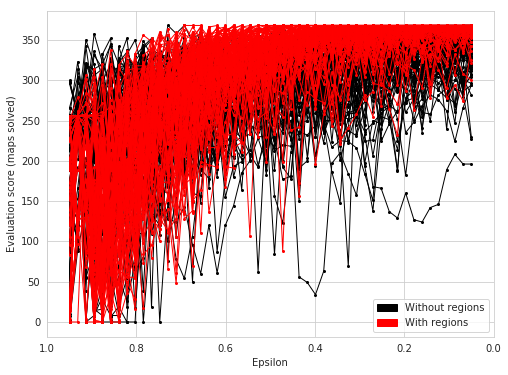

In [3]:
figsize(8,6)
ltoplot = data_nr.set_index(["epsilon","n"])['eval_reach'].unstack()
ltoplot.plot(style='-o', color='k', lw=1, markersize=2, ax=gca(), legend=False)
ltoplot = data_r.set_index(["epsilon","n"])['eval_reach'].unstack()
ltoplot.plot(style='-o', color='r', lw=1, markersize=2, ax=gca(), legend=False)

p1 = mpl.patches.Patch(color='k', label='Without regions')
p2 = mpl.patches.Patch(color='r', label='With regions')
plt.legend(handles=[p1,p2], loc=0)

xlabel('Epsilon'); xlim(1,0)
#yscale('log'); 
#ylim(300,370)
ylabel('Evaluation score (maps solved)')

Text(0, 0.5, 'Evaluation score (maps solved)')

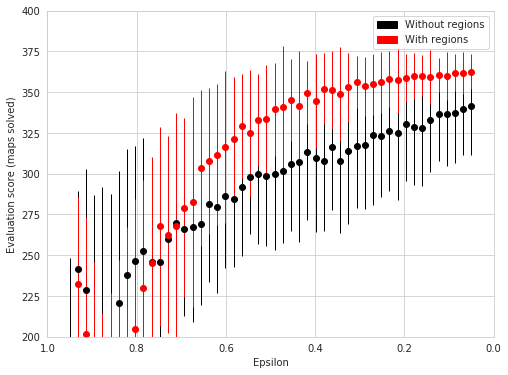

In [4]:
lval = data_nr.set_index(["epsilon","n"])['eval_reach'].unstack().mean(axis=1)
lerr = data_nr.set_index(["epsilon","n"])['eval_reach'].unstack().std(axis=1)
errorbar(x=lval.index, y=lval.values, yerr=lerr.values, fmt='o', color='k', lw=1)
lval = data_r.set_index(["epsilon","n"])['eval_reach'].unstack().mean(axis=1)
lerr = data_r.set_index(["epsilon","n"])['eval_reach'].unstack().std(axis=1)
errorbar(x=lval.index, y=lval.values, yerr=lerr.values, fmt='o', color='r', lw=1)

p1 = mpl.patches.Patch(color='k', label='Without regions')
p2 = mpl.patches.Patch(color='r', label='With regions')
plt.legend(handles=[p1,p2], loc=0)


xlabel('Epsilon'); xlim(1,0)
ylim(200,400)
ylabel('Evaluation score (maps solved)')

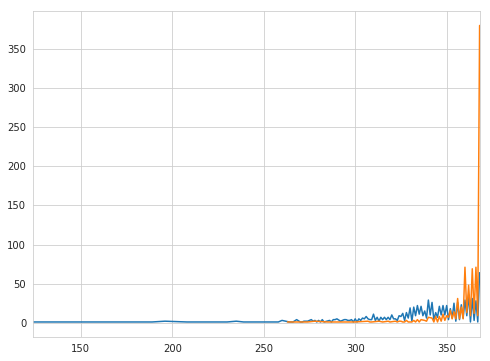

In [5]:

hframe = pd.DataFrame(
{ "Without regions" : data_nr.set_index(["epsilon","n"])['eval_reach'].sort_index().loc[:0.2] 
, "With regions" : data_r.set_index(["epsilon","n"])['eval_reach'].sort_index().loc[:0.2] 
})
#pd.cut(hframe, bins=np.arange(250,368))
hframe["Without regions"].value_counts().sort_index().plot()
hframe["With regions"].value_counts().sort_index().plot()



# Loss

Text(0, 0.5, 'Training loss')

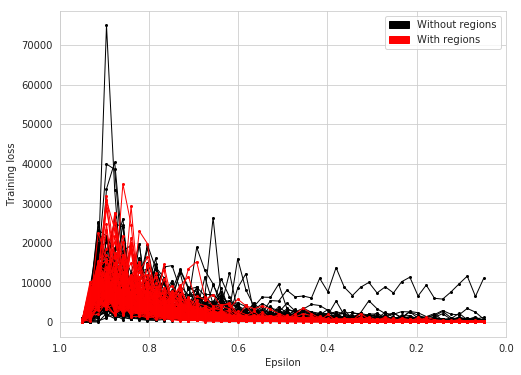

In [6]:
figsize(8,6)
ltoplot = data_nr.set_index(["epsilon","n"])['loss'].unstack()
ltoplot.plot(style='-o', color='k', lw=1, markersize=2, ax=gca(), legend=False)
ltoplot = data_r.set_index(["epsilon","n"])['loss'].unstack()
ltoplot.plot(style='-o', color='r', lw=1, markersize=2, ax=gca(), legend=False)

p1 = mpl.patches.Patch(color='k', label='Without regions')
p2 = mpl.patches.Patch(color='r', label='With regions')
plt.legend(handles=[p1,p2], loc=0)

xlabel('Epsilon'); xlim(1,0)
#yscale('log'); ylim
ylabel('Training loss')

Text(0, 0.5, 'Q-Neural network loss')

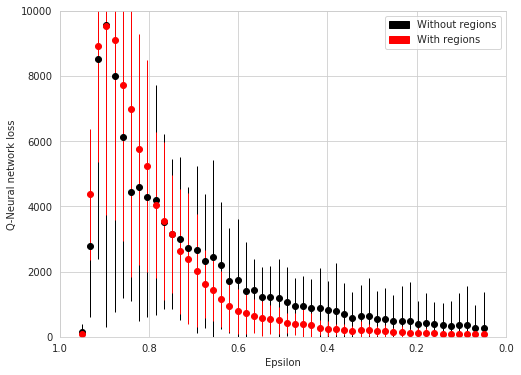

In [7]:
lval = data_nr.set_index(["epsilon","n"])['loss'].unstack().mean(axis=1)
lerr = data_nr.set_index(["epsilon","n"])['loss'].unstack().std(axis=1)
errorbar(x=lval.index, y=lval.values, yerr=lerr.values, fmt='o', color='k', lw=1)
lval = data_r.set_index(["epsilon","n"])['loss'].unstack().mean(axis=1)
lerr = data_r.set_index(["epsilon","n"])['loss'].unstack().std(axis=1)
errorbar(x=lval.index, y=lval.values, yerr=lerr.values, fmt='o', color='r', lw=1)

p1 = mpl.patches.Patch(color='k', label='Without regions')
p2 = mpl.patches.Patch(color='r', label='With regions')
plt.legend(handles=[p1,p2], loc=0)


xlabel('Epsilon'); xlim(1,0)
ylim(1,10000)#; yscale('log')
ylabel('Q-Neural network loss')